# Is Snow Cover Extent Decreasing?

Data source: https://climate.rutgers.edu/snowcover/table_area.php?ui_set=2&ui_sort=0

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from prophet import Prophet
import pymannkendall as mk

# Hide Stanpy logs
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

#az.style.use("arviz-darkgrid")

In [2]:
def read_data(url):
    df = pd.read_csv(url, sep=' ', header=None)
    df = df[[0, 2, 4]]
    df.columns = ['year', 'month', 'extent']
    df['ds'] = pd.to_datetime(df['year'].astype(str) + "-" + df['month'].astype(str) + '-01')
    df.index = df['ds']
    df['y'] = df['extent'] / 1000000
    df = df[['ds', 'y']]
    df = df.resample('m').mean(numeric_only=True)[['y']]
    return df

In [3]:
def fit_model(df, col):
    df = df.copy()
    df['ds'] = df.index
    df['y'] = df[col]
    model = Prophet(interval_width=0.999, mcmc_samples=1000, yearly_seasonality=False, weekly_seasonality=False)
    model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
    model.fit(df, show_progress=False)
    future = model.make_future_dataframe(periods=0)
    forecast = model.predict(future)
    forecast.index = forecast['ds'].dt.to_pydatetime()
    return model, forecast

# Northern Hemisphere

In [4]:
url = "https://climate.rutgers.edu/snowcover/files/moncov.nhland.txt"

In [5]:
df = read_data(url)

In [6]:
model, forecast = fit_model(df, col='y')

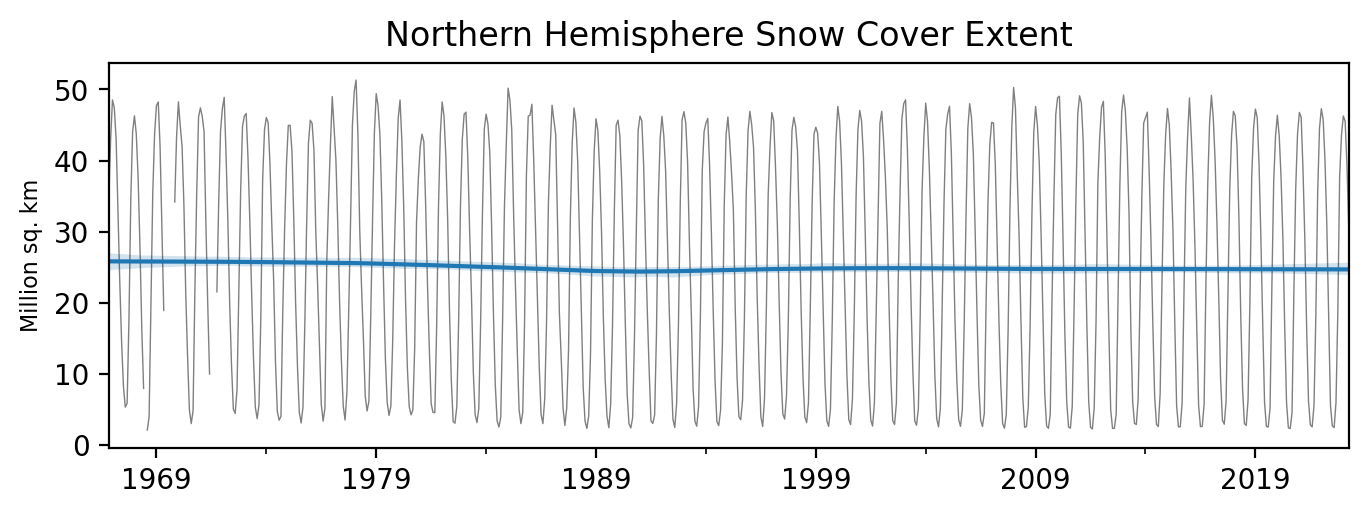

In [7]:
fig = plt.figure(figsize=(8, 2.5), constrained_layout=False, dpi=200)
ax1 = fig.add_subplot()
df['y'].plot(linewidth=0.5, ax=ax1, color='black', alpha=0.5)
forecast['trend'].plot(ax=ax1)
ax1.set_title('Northern Hemisphere Snow Cover Extent', fontsize=12)
ax1.fill_between(forecast.index, forecast['trend_lower'], forecast['trend_upper'], alpha=0.2)
plt.xlabel('')
plt.ylabel('Million sq. km', fontsize=8)
plt.show();

In [8]:
changepoint = "1989-01-01"

In [9]:
pre_period = mk.original_test(forecast.loc[:changepoint]['trend'])
print(pre_period)
print(" ")
print("Decadal Slope (million sq. km per decade):",  pre_period.slope*12)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-24.30359654340888, Tau=-1.0, s=-35245.0, var_s=2102951.6666666665, slope=-0.00493236831918255, intercept=26.232999351634295)
 
Decadal Slope (million sq. km per decade): -0.059188419830190596


In [10]:
post_period = mk.original_test(forecast.loc[changepoint:]['trend'])
print(post_period)
print(" ")
print("Decadal Slope (million sq. km per decade):",  post_period.slope*12)

Mann_Kendall_Test(trend='no trend', h=False, p=0.15860126167444477, z=-1.4097914848952584, Tau=-0.046512177261238276, s=-3938.0, var_s=7798679.333333333, slope=-0.00011941542391046575, intercept=24.767541131433475)
 
Decadal Slope (million sq. km per decade): -0.001432985086925589


## Eurasia

In [11]:
url = "https://climate.rutgers.edu/snowcover/files/moncov.eurasia.txt"

In [12]:
df = read_data(url)

In [13]:
model, forecast = fit_model(df, col='y')

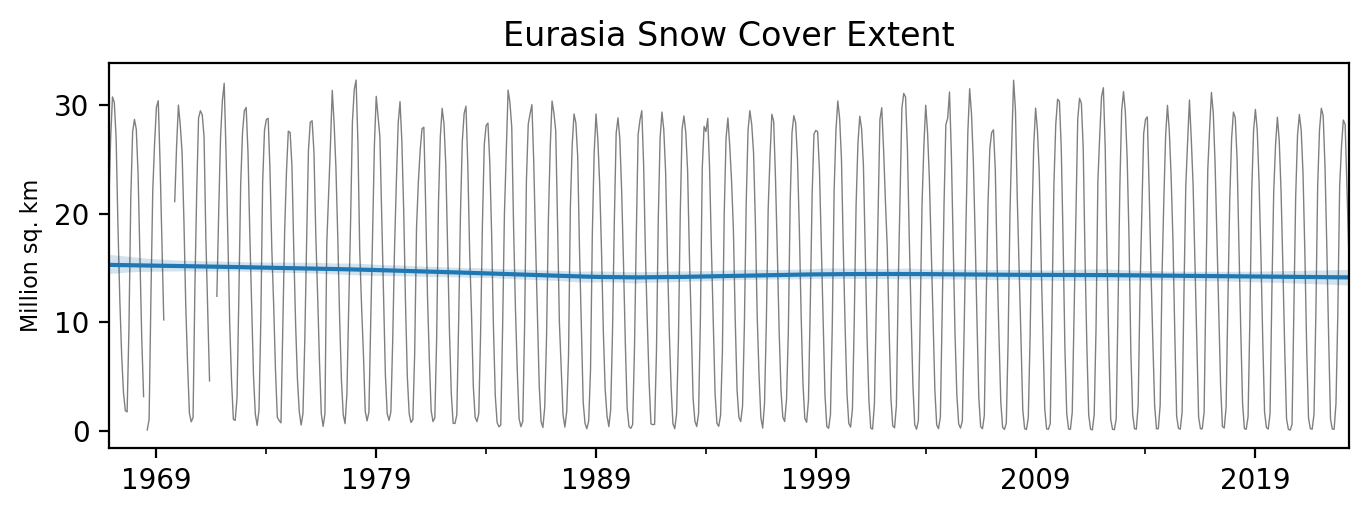

In [14]:
fig = plt.figure(figsize=(8, 2.5), constrained_layout=False, dpi=200)
ax1 = fig.add_subplot()
df['y'].plot(linewidth=0.5, ax=ax1, color='black', alpha=0.5)
forecast['trend'].plot(ax=ax1)
ax1.set_title('Eurasia Snow Cover Extent', fontsize=12)
ax1.fill_between(forecast.index, forecast['trend_lower'], forecast['trend_upper'], alpha=0.2)
plt.xlabel('')
plt.ylabel('Million sq. km', fontsize=8)
plt.show();

In [15]:
changepoint = "1989-01-01"

In [16]:
pre_period = mk.original_test(forecast.loc[:changepoint]['trend'])
print(pre_period)
print(" ")
print("Decadal Slope (million sq. km per decade):",  pre_period.slope*12)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-24.30359654340888, Tau=-1.0, s=-35245.0, var_s=2102951.6666666665, slope=-0.004133531314879205, intercept=15.406417298987286)
 
Decadal Slope (million sq. km per decade): -0.049602375778550464


In [17]:
post_period = mk.original_test(forecast.loc[changepoint:]['trend'])
print(post_period)
print(" ")
print("Decadal Slope (million sq. km per decade):",  post_period.slope*12)

Mann_Kendall_Test(trend='decreasing', h=True, p=4.116497587247636e-09, z=-5.879442822071438, Tau=-0.19393853494909408, s=-16420.0, var_s=7798679.333333333, slope=-0.0004514835380724418, intercept=14.405710369444598)
 
Decadal Slope (million sq. km per decade): -0.005417802456869301


## North America

In [18]:
url = "https://climate.rutgers.edu/snowcover/files/moncov.namgnld.txt"

In [19]:
df = read_data(url)

In [20]:
model, forecast = fit_model(df, col='y')

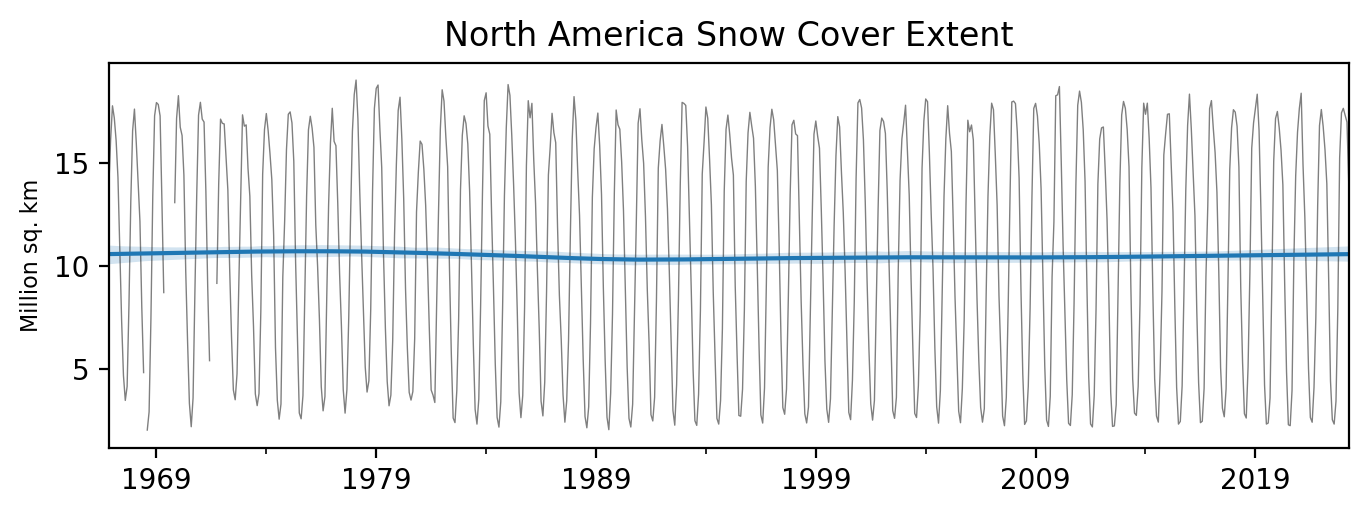

In [21]:
fig = plt.figure(figsize=(8, 2.5), constrained_layout=False, dpi=200)
ax1 = fig.add_subplot()
df['y'].plot(linewidth=0.5, ax=ax1, color='black', alpha=0.5)
forecast['trend'].plot(ax=ax1)
ax1.set_title('North America Snow Cover Extent', fontsize=12)
ax1.fill_between(forecast.index, forecast['trend_lower'], forecast['trend_upper'], alpha=0.2)
plt.xlabel('')
plt.ylabel('Million sq. km', fontsize=8)
plt.show();

In [22]:
changepoint = "1989-01-01"

In [23]:
pre_period = mk.original_test(forecast.loc[:changepoint]['trend'])
print(pre_period)
print(" ")
print("Decadal Slope (million sq. km per decade):",  pre_period.slope*12)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-8.936971149772416, Tau=-0.3677401049794297, s=-12961.0, var_s=2102951.6666666665, slope=-0.00092503325785323, intercept=10.750088122678605)
 
Decadal Slope (million sq. km per decade): -0.01110039909423876


In [24]:
post_period = mk.original_test(forecast.loc[changepoint:]['trend'])
print(post_period)
print(" ")
print("Decadal Slope (million sq. km per decade):",  post_period.slope*12)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=27.02452465673362, Tau=0.8913849715352089, s=75470.0, var_s=7798679.333333333, slope=0.0005783201369291545, intercept=10.288499981343021)
 
Decadal Slope (million sq. km per decade): 0.006939841643149855


## North America (Excluding Greenland)

In [25]:
url = "https://climate.rutgers.edu/snowcover/files/moncov.nam.txt"

In [26]:
df = read_data(url)

In [27]:
model, forecast = fit_model(df, col='y')

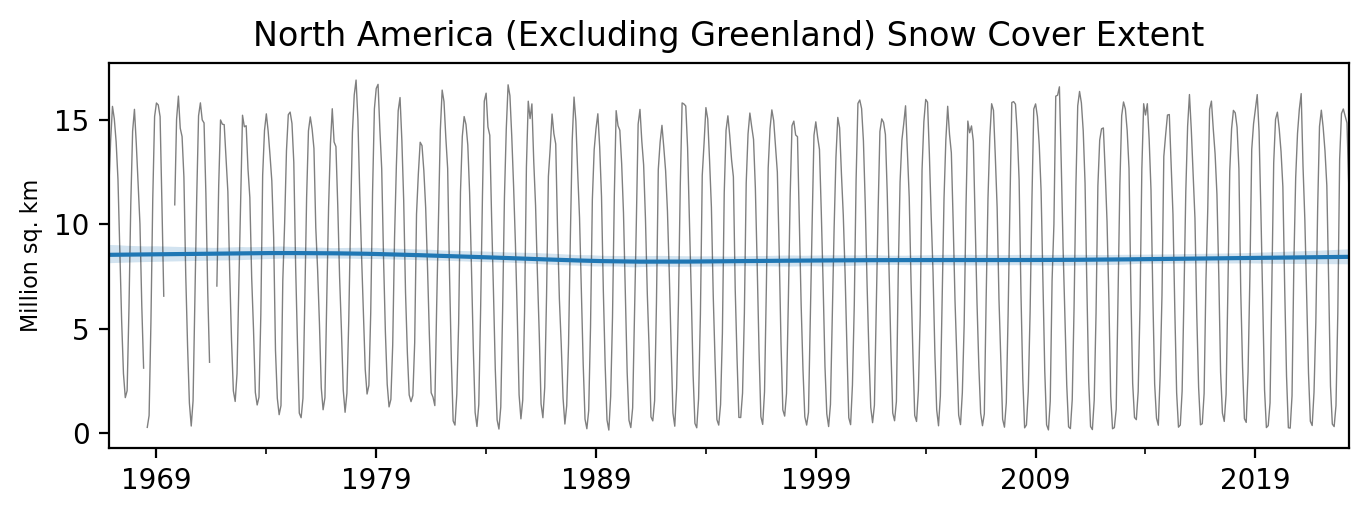

In [28]:
fig = plt.figure(figsize=(8, 2.5), constrained_layout=False, dpi=200)
ax1 = fig.add_subplot()
df['y'].plot(linewidth=0.5, ax=ax1, color='black', alpha=0.5)
forecast['trend'].plot(ax=ax1)
ax1.set_title('North America (Excluding Greenland) Snow Cover Extent', fontsize=12)
ax1.fill_between(forecast.index, forecast['trend_lower'], forecast['trend_upper'], alpha=0.2)
plt.xlabel('')
plt.ylabel('Million sq. km', fontsize=8)
plt.show();

In [29]:
changepoint = "1989-01-01"

In [30]:
pre_period = mk.original_test(forecast.loc[:changepoint]['trend'])
print(pre_period)
print(" ")
print("Decadal Slope (million sq. km per decade):",  pre_period.slope*12)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-12.681396562061323, Tau=-0.5218045112781955, s=-18391.0, var_s=2102951.6666666665, slope=-0.0012258181670902115, intercept=8.714170987278578)
 
Decadal Slope (million sq. km per decade): -0.014709818005082538


In [31]:
post_period = mk.original_test(forecast.loc[changepoint:]['trend'])
print(post_period)
print(" ")
print("Decadal Slope (million sq. km per decade):",  post_period.slope*12)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=28.269237687339643, Tau=0.9324404129166372, s=78946.0, var_s=7798679.333333333, slope=0.0005091084995894235, intercept=8.175570022295902)
 
Decadal Slope (million sq. km per decade): 0.006109301995073082
